## 195 - Declarative METAR Plots and New GEMPAK Regions

[Youtube](https://www.youtube.com/watch?v=Fa0tGT2PbIw)

In [1]:
from siphon.catalog import TDSCatalog

In [2]:
cat = TDSCatalog('https://thredds-test.unidata.ucar.edu/thredds/catalog/noaaport/text/metar/catalog.xml')

In [3]:
ds = cat.datasets[-12]
ds.download()

In [4]:
from metpy.io import parse_metar_file

In [5]:
df = parse_metar_file(ds.name)
df.head()

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility,current_wx1,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
KC62,KC62,41.47,-85.27,306.0,2022-09-30 09:55:00,0.0,0.0,NaN,2816.352,BR,...,2.0,2.0,30.33,10,0,0,AO2 T00300030,1029.11,-0.000000,-0.000000
KMCX,KMCX,40.72,-86.77,206.0,2022-09-30 09:55:00,0.0,0.0,NaN,16093.440,NaN,...,7.0,7.0,30.31,0,0,0,AO2 T00730066,1027.43,-0.000000,-0.000000
KRID,KRID,39.75,-84.85,348.0,2022-09-30 09:55:00,50.0,6.0,NaN,16093.440,NaN,...,4.0,4.0,30.29,0,0,0,AO2,1027.64,-4.596267,-3.856726
KFMH,KFMH,41.63,-70.52,40.0,2022-09-30 09:45:00,0.0,0.0,NaN,16093.440,NaN,...,9.0,8.0,30.34,0,0,0,,1027.84,-0.000000,-0.000000
MMTC,MMTC,25.57,-103.40,1124.0,2022-09-30 09:40:00,0.0,0.0,NaN,12874.752,NaN,...,18.0,7.0,30.15,0,0,0,HZY ISOL AS CI RTS,1018.32,-0.000000,-0.000000


In [6]:
df = df.dropna(subset = ['air_temperature', 'dew_point_temperature', 'air_pressure_at_sea_level', 'cloud_coverage', 'current_wx1_symbol'], how = 'any', axis = 'index')
df.index.name = None

In [7]:
import metpy.calc as mpcalc
from metpy.units import units

In [8]:
df['uwind'], df['vwind'] = mpcalc.wind_components(df['wind_speed'].values * units('m/s'), df['wind_direction'].values * units('degrees'))

In [9]:
import metpy.plots as mpplots

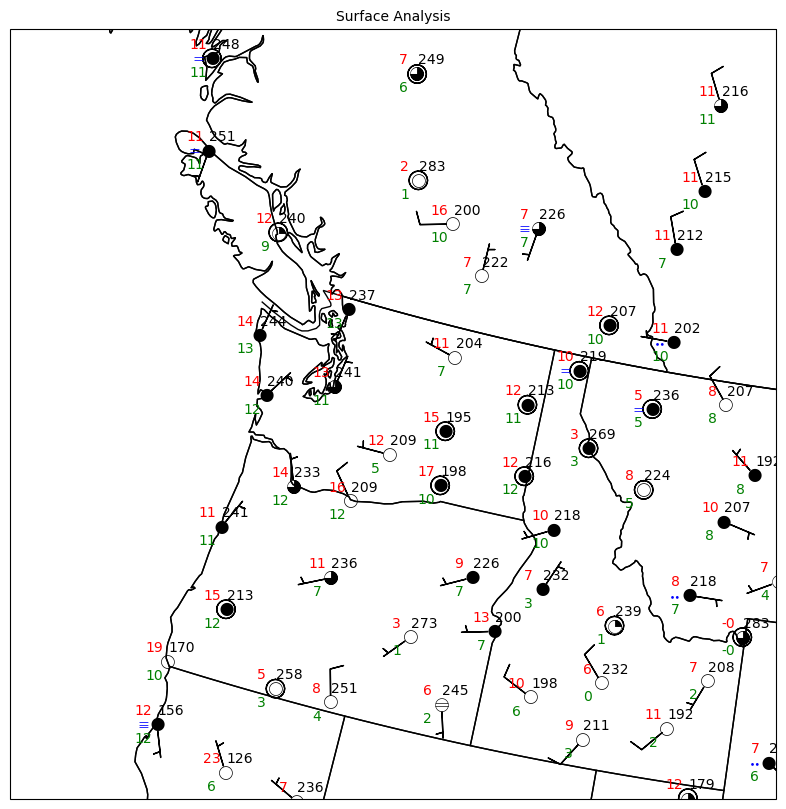

In [10]:
obs = mpplots.PlotObs()
obs.data = df
obs.level = None
obs.fields = ['air_temperature', 'dew_point_temperature', 'air_pressure_at_sea_level', 'cloud_coverage', 'current_wx1_symbol']
obs.locations = ['NW', 'SW', 'NE', 'C', 'W']
obs.colors = ['red', 'green', 'black', 'black', 'blue']
obs.formats = [None, None, lambda v: format(10 * v, '.0f')[-3:], 'sky_cover', 'current_weather']
obs.vector_field = ('uwind', 'vwind')
obs.reduce_points = 1


panel = mpplots.MapPanel()
panel.layout = (1, 1, 1)
panel.area = 'wa'
panel.projection = 'lcc'
panel.layers = ['coastline', 'borders', 'states']
panel.plots = [obs]
panel.title = 'Surface Analysis'

pc = mpplots.PanelContainer()
pc.size = (10, 10)
pc.panels = [panel]

pc.show()